In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
EV_df = pd.read_csv('ElectricCarData_Clean.csv', delimiter=",")
EV_df.drop(EV_df[EV_df['TopSpeed_KmH'] == 410].index, inplace = True)
EV_df.sort_values('TopSpeed_KmH', ascending=False)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
59,Tesla,Model S Performance,2.5,261,505,188,550,Yes,AWD,Type 2,Liftback,F,5,96990
24,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
16,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781
79,Porsche,Taycan Turbo,3.2,260,390,215,810,Yes,AWD,Type 2 CCS,Sedan,F,4,148301
40,Tesla,Model S Long Range,3.8,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Volkswagen,e-Up!,11.9,130,195,166,170,Yes,FWD,Type 2 CCS,Hatchback,A,4,21421
44,SEAT,Mii Electric,12.3,130,195,166,170,Yes,FWD,Type 2 CCS,Hatchback,A,4,20129
43,Skoda,CITIGOe iV,12.3,130,195,166,170,Yes,FWD,Type 2 CCS,Hatchback,A,4,24534
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000


I decided to choose Electric Vehicles dataset despite small number of records. In next part i will try to predict car accelerations. I decided to drop car with high speed 410 km/H becaouse it is far away from other samplings and it disturb computing.

In [3]:
print(EV_df.shape)
# I needed to cut date becouse there are repetition few times and in world cup are only 32 teams

(102, 14)


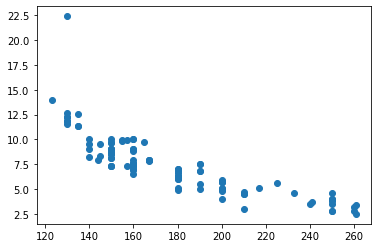

In [4]:
X = EV_df.TopSpeed_KmH.values.reshape(-1,1)
y = EV_df.AccelSec.values.reshape(-1)
plt.scatter(X,y)

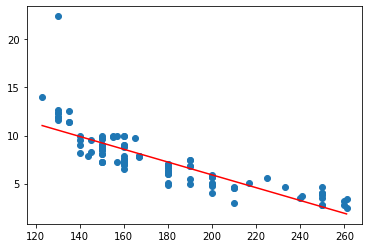

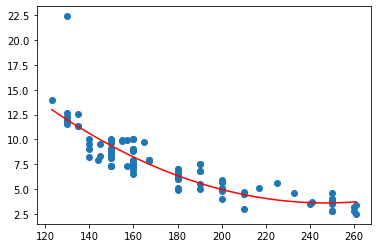

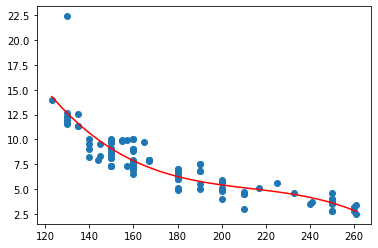

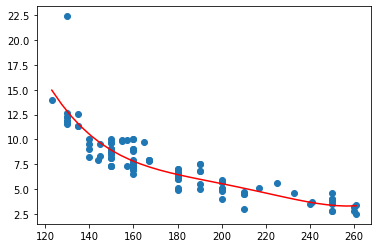

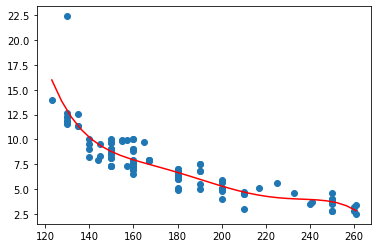

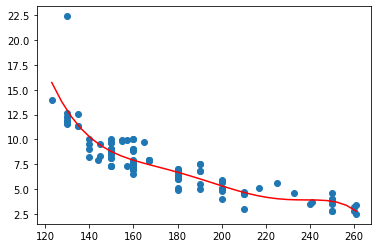

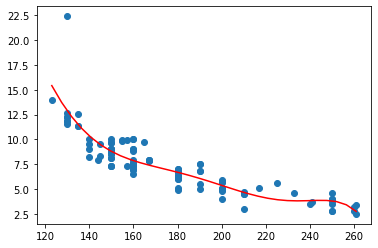

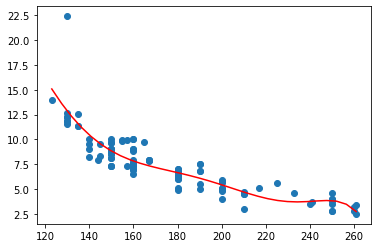

In [5]:
mean = []
regr = LinearRegression()
for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    regr = regr.fit(X_order, y)
    mean.append(mean_squared_error(regr.predict(poly.fit_transform(X)), y))
    X_seq = np.linspace(X.min(),X.max(),32).reshape(-1,1)
    y_fit = regr.predict(poly.fit_transform(X_seq))
    plt.scatter(X,y)
    plt.plot(X_seq, y_fit, color='red')
    plt.show()

As we can see points are almost linear so probably we will not need to high degree of polynomial.

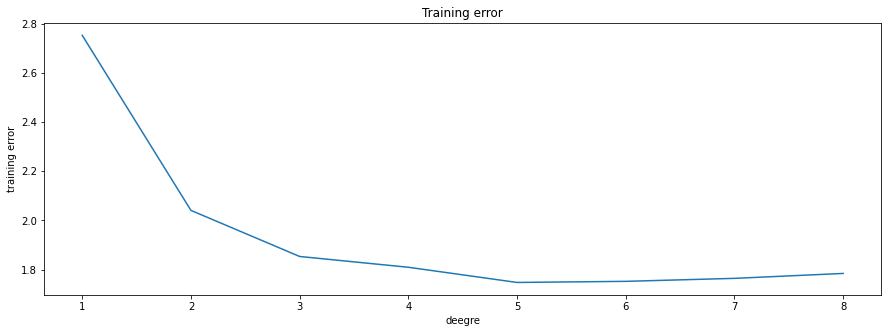

In [55]:
#Your code:
degree = [*range(1,9)]
plt.figure(figsize=(15, 5))
plt.title("Training error")
plt.xlabel("deegre")
plt.ylabel("training error")
plt.plot(degree,mean)

Whats interesting lowest training error is at degree 5 next it start increace

[712.5449889406156, 3359.2552180858256, 13566.04599377607, 42197.2755230641, 253430.46659477352, 889.6055759592911, 5.119727944057047, 1.2590882101355532]
[52.43123510171453, 1124.3070775664557, 18233.491935184677, 175560.8688981625, 6292772.71705284, 76.00212659295319, 1.2024774682718151, 1.2401753163160671]


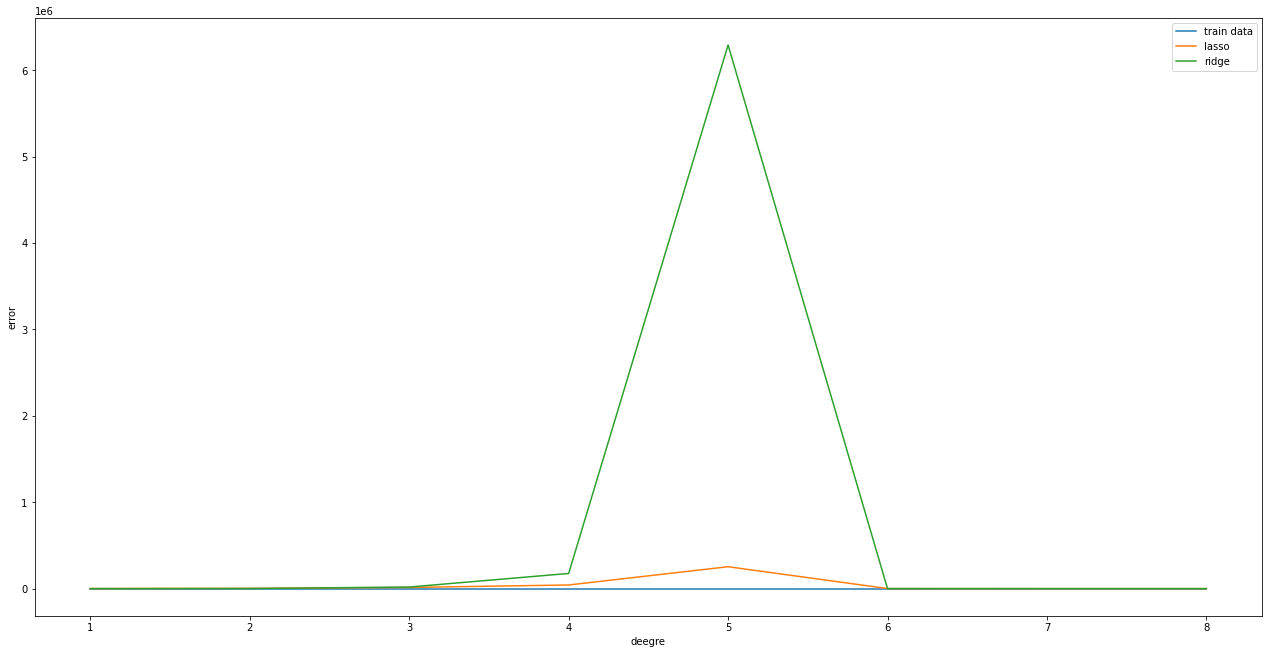

In [61]:
train_error = []
test_error = []
ridge_error = []
lasso_error = []
for order in range (1,9):
    poly = PolynomialFeatures (order, include_bias = False)
    X_order = poly.fit_transform (X)
    
    X_train, X_test, y_train, y_test = train_test_split (X_order, y, test_size=0.3, random_state=44)
    model_train = LinearRegression ()
    model_test = LinearRegression ()
    model_train.fit (X_train,y_train)
    
    model_test.fit (X_test,y_test)
    y_pred_train = model_train.predict (X_train)
    y_pred_test = model_train.predict (X_test)
    lasso = np.absolute(model_train.coef_)
    ridge = np.square(model_train.coef_)
    test_error.append (mean_squared_error (y_test,y_pred_test))
    lasso_error.append (mean_squared_error (y_test,y_pred_test) + 10000*np.sum(lasso))
    ridge_error.append (mean_squared_error (y_test,y_pred_test) + 10000*np.sum(ridge))
    
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(11)

plt.xlabel("deegre")
plt.ylabel("error")
plt.plot(degree,test_error,label="train error")
plt.plot(degree,lasso_error,label="lasso")
plt.plot(degree,ridge_error,label="ridge")
plt.legend()
print(lasso_error)
print(ridge_error)

We can observe that after using ridge and lasso regularization the best degree is 8 becouse all coefficients are almost equal to 0

In [8]:
X = [EV_df.TopSpeed_KmH, EV_df.Range_Km]
X = np.array(X).T
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

[712.5449889406156, 3359.2552180858256, 13566.04599377607, 42197.2755230641, 253430.46659477352, 889.6055759592911, 5.119727944057047, 1.2590882101355532]
[52.43123510171453, 1124.3070775664557, 18233.491935184677, 175560.8688981625, 6292772.71705284, 76.00212659295319, 1.2024774682718151, 1.2401753163160671]


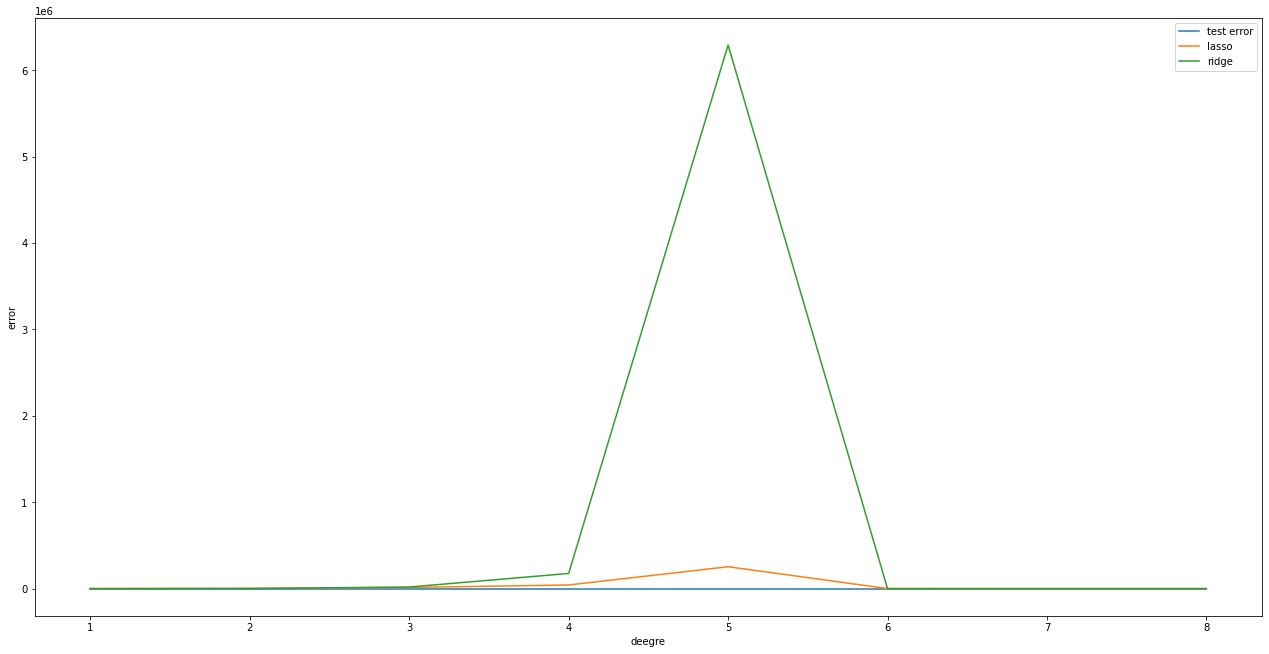

In [63]:
train_error = []
test_error = []
ridge_error = []
lasso_error = []
for order in range (1,9):
    poly = PolynomialFeatures (order, include_bias = False)
    X_order = poly.fit_transform (X)
    
    X_train, X_test, y_train, y_test = train_test_split (X_order, y, test_size=0.3, random_state=44)
    model_train = LinearRegression ()
    model_test = LinearRegression ()

    
    model_train.fit (X_train,y_train) 
    model_test.fit (X_test,y_test)
    y_pred_train = model_train.predict (X_train)
    y_pred_test = model_train.predict (X_test)
    

    lasso = np.absolute(model_train.coef_)
    ridge = np.square(model_train.coef_)
    test_error.append (mean_squared_error (y_test,y_pred_test))
    lasso_error.append (mean_squared_error (y_test,y_pred_test) + 10000*np.sum(lasso))
    ridge_error.append (mean_squared_error (y_test,y_pred_test) + 10000*np.sum(ridge))
    
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(11)

plt.xlabel("deegre")
plt.ylabel("error")
plt.plot(degree,test_error,label="test error")
plt.plot(degree,lasso_error,label="lasso")
plt.plot(degree,ridge_error,label="ridge")
plt.legend()
print(lasso_error)
print(ridge_error)

Now i tried to predict acceleration based on two features: top speed and range. Also in this case the best result have degree 8 and second best degree 1.

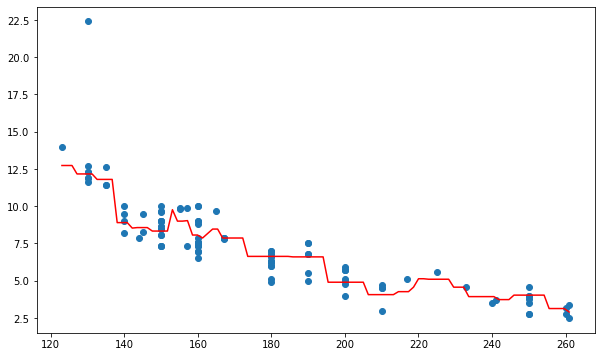

In [49]:
from sklearn.neighbors import KNeighborsRegressor
X = EV_df.TopSpeed_KmH.values.reshape(-1,1)
y = EV_df.AccelSec.values.reshape(-1)
#fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

clf = KNeighborsRegressor(n_neighbors=3, weights='uniform')
clf = clf.fit(X, y)
X_seq = np.linspace(X.min(),X.max(),102).reshape(-1,1)
y_pred = clf.predict(X_seq)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X_seq,y_pred, color='red')

Chart above is a non parametric regression,each point on the line which was drawn is based on 3 closest point with the same weight

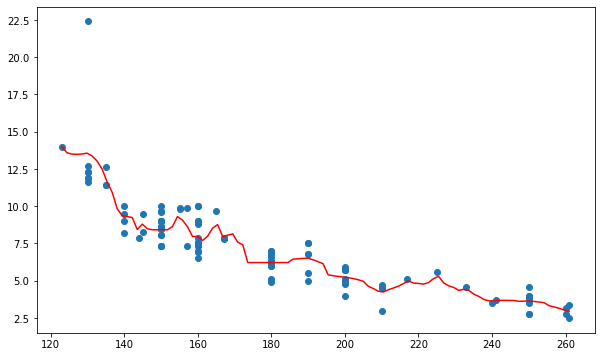

In [50]:
from sklearn.neighbors import KNeighborsRegressor
X = EV_df.TopSpeed_KmH.values.reshape(-1,1)
y = EV_df.AccelSec.values.reshape(-1)
#fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

clf = KNeighborsRegressor(n_neighbors=10, weights='distance')
clf = clf.fit(X, y)
X_seq = np.linspace(X.min(),X.max(),102).reshape(-1,1)
y_pred = clf.predict(X_seq)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X_seq,y_pred, color='red')

I decided to make other non parametric regression model. However in that case i decided to take more points and add weight so the closest point have bigger inpact on predicted point. We can notice that changes between close points are smaller and the line is less sharpe.

In [64]:
#b)
X = EV_df.TopSpeed_KmH.values.reshape(-1,1)
y = EV_df.AccelSec.values.reshape(-1,1)

def predict(b, X):
    return X.dot(b)

def cost(y_pred, y_true):
    return ((np.linalg.norm(y_pred - y_true)) ** 2)/len(y_pred)
def standardize(X):
    #a = np.array(X)
    #means = np.mean(a, axis=0)
    #stds = a.std(axis=0)
    #for i in range(len(X)):
     #   for j in range(len(X[i])):
      #      X[i][j] = (X[i][j] - means[j])/stds[j]
       # print(X[i])
    return (X-np.mean(X, axis=0))/np.std(X, axis=0)

#b)
def destandardize(X, means, sds):
    for i in range(len(X)):
        for j in range(len(X[i])):
            X[i][j] = (X[i][j] * sds[j]) + means[j]
            
    return np.array(X)

def gradient(b, X, y):
    return (2*X.transpose()).dot((X.dot(b) - y))/len(y)

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b,X,y)*lr

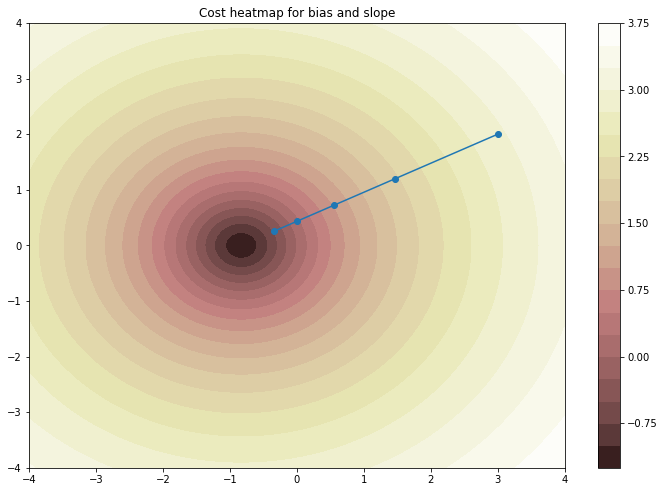

In [65]:

#b)
Standardized_X = standardize(X)
Standardized_Y = standardize(y)
lr = 0.2
bias = np.array([[1 for i in range(102)]])
bias = bias.reshape(102,1)
Standardized_X = np.append(Standardized_X, bias, axis=1)

# Fill the cost matrix for each combination of coefficients
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

b = np.zeros((0))
b = np.append(b, [[3], [2]])
b = b.reshape(1,2,1)
for i in range(4):
    b = np.append(b, gradient_descent_step(b[len(b)-1], Standardized_X, Standardized_Y, lr))
    b = b.reshape(i+2,2,1)
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix



# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), Standardized_X) , Standardized_Y)


plt.figure(figsize=(12,18)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=1, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(b[:,0], b[:, 1])
plt.plot(b[:,0], b[:, 1])
plt.show()
plt.show()

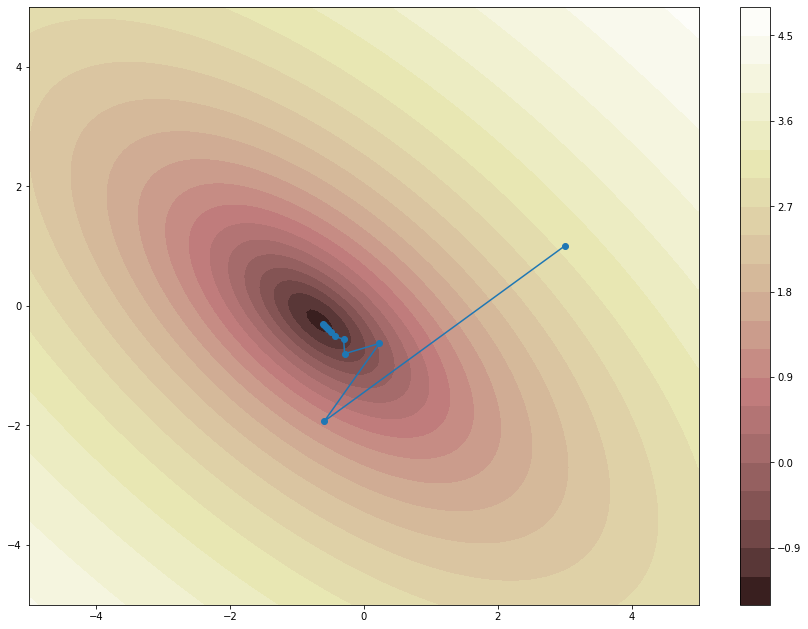

In [45]:

X = [EV_df.TopSpeed_KmH, EV_df.Range_Km]
X = np.array(X).T
lr = 0.4
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5, 5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5, 5, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

Standardized_X = standardize(X)
Standardized_Y = standardize(y)


 # Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        b = np.array([[b_x[i,j]], [b_y[i,j]]])
        cost_arr_2d[i,j] = cost(predict(b, Standardized_X), Standardized_Y)

b = np.zeros((0))
b = np.append(b, [[3], [1]])
b = b.reshape(1,2,1)
for i in range(10):
    b = np.append(b, gradient_descent_step(b[len(b)-1], Standardized_X, Standardized_Y, lr))
    b = b.reshape(i+2,2,1)

plt.figure(figsize=(15,11)) 

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=1, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(b[:,0], b[:, 1])
plt.plot(b[:,0], b[:, 1])
plt.show()

At the last part I drow two heatmaps. On the first one gradient headind directly towards minimum. In second I decided to choose bigger learnig rate even though it move fist  in wrong direction, but all in all gradient reach minimum faster than with smaller learning rate